In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
from google.colab import drive
drive.mount('/content/gdrive')

cuda
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
def gaussian_blur(img):
    image = np.array(img)
    image_blur = cv2.GaussianBlur(image,(3,3),0)
    new_image = image_blur
    #print(new_image.shape)
    return new_image

In [ ]:
import cv2
import numpy as np
def sharpen(img):
  npimg = np.array(img)
  #im2arr = np.rollaxis(im2arr, 2, 0)
  #print(type(npimg))
  #print(npimg.shape)
  kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
        ])
  #kernel = 0.9 * kernel
  #dst = cv2.filter2D(np.transpose(npimg, (1, 2, 0)), -1, kernel)
  dst = cv2.filter2D(npimg, -1, kernel)
  #print(dst.shape)
  #print(type(dst))
  #dst = torch.from_numpy(dst)
  #dst = Image.fromarray(dst)
  return dst

In [ ]:
import cv2
import numpy as np
import skimage.util 
def salt_pepper(img):
  npimg = np.array(img)
  dst = skimage.util.random_noise(npimg, mode='s&p',amount=0.009)
  dst = np.array(255*dst, dtype = 'uint8')
  #dst = np.array(255*dst)
  #print(type(dst))
  #print(dst)
  return dst

In [ ]:
import numpy as np
def shadow(img):
  npimg = np.array(img)
  dst = np.array((npimg*0.65) + 25, dtype = 'uint8')
  #dst = np.array(255*dst)
  #print(type(dst))
  #print(dst)
  return dst

In [ ]:
import numpy as np
import cv2
def sobel(img):
  npimg = np.array(img)
  img_sobelx = cv2.Sobel(npimg,cv2.CV_64F,1,0,ksize=3)
  img_sobely = cv2.Sobel(npimg,cv2.CV_64F,0,1,ksize=3)
  img_sobel = np.sqrt((img_sobelx ** 2 + img_sobely** 2))
  #print(type(img_sobel))
  maxx = np.max(img_sobel)
      
  minn = np.min(img_sobel)

  img_sobel = (img_sobel - minn)/(maxx - minn)
  #print(type(img_sobel))
  img_sobel = np.array(img_sobel, dtype = 'float32')
  return img_sobel

In [ ]:
import numpy as np
import cv2
def canny(img):
  npimg = np.array(img)
  cat = cv2.Laplacian(npimg,cv2.CV_64F)
  cat = np.array(cat, dtype = 'float32')
  #edges = cv2.Canny(npimg,190,200)
  #edges = np.expand_dims(edges, axis=2)
  #cat = np.concatenate((edges, edges), axis=2)
  #cat = np.concatenate((cat, edges), axis=2)
  #cat = np.reshape(cat,(32,32,3))
  return cat

In [ ]:
import numpy as np
import cv2
def occlude(img):
  npimg = np.array(img)
  # npimg[24:32,24:32,:] = 110
  npimg[10:21,10:21,:] = 110
  #cat = np.concatenate((edges, edges), axis=2)
  #cat = np.concatenate((cat, edges), axis=2)
  #cat = np.reshape(cat,(32,32,3))
  return npimg

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Lambda(lambda x: occlude(x)),
    #transforms.Lambda(lambda x: salt_pepper(x)),
    #transforms.Lambda(lambda x: gaussian_blur(x)),
    #transforms.Lambda(lambda x: sharpen(x)),
    #transforms.Lambda(lambda x: shadow(x)),
    #transforms.Lambda(lambda x: sobel(x)),
    #transforms.Lambda(lambda x: canny(x)),
    #transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.Lambda(lambda x: occlude(x)),
    #transforms.Lambda(lambda x: sharpen(x)),  
    #transforms.Lambda(lambda x: gaussian_blur(x)),  
    #transforms.Lambda(lambda x: salt_pepper(x)),                             
    #transforms.Lambda(lambda x: shadow(x)),
    #transforms.Lambda(lambda x: sobel(x)),
    #transforms.Lambda(lambda x: canny(x)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
torch.Size([3, 32, 32])
(32, 32, 3)


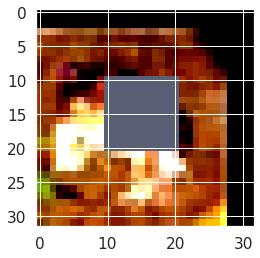

label:  6


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sample = next(iter(trainset))
image, label = sample
print(type(image))
print(image.shape)
image = image / 2 + 0.5
npimg = image.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
print((np.transpose(npimg, (1, 2, 0))).shape)

plt.show()
print('label: ', label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


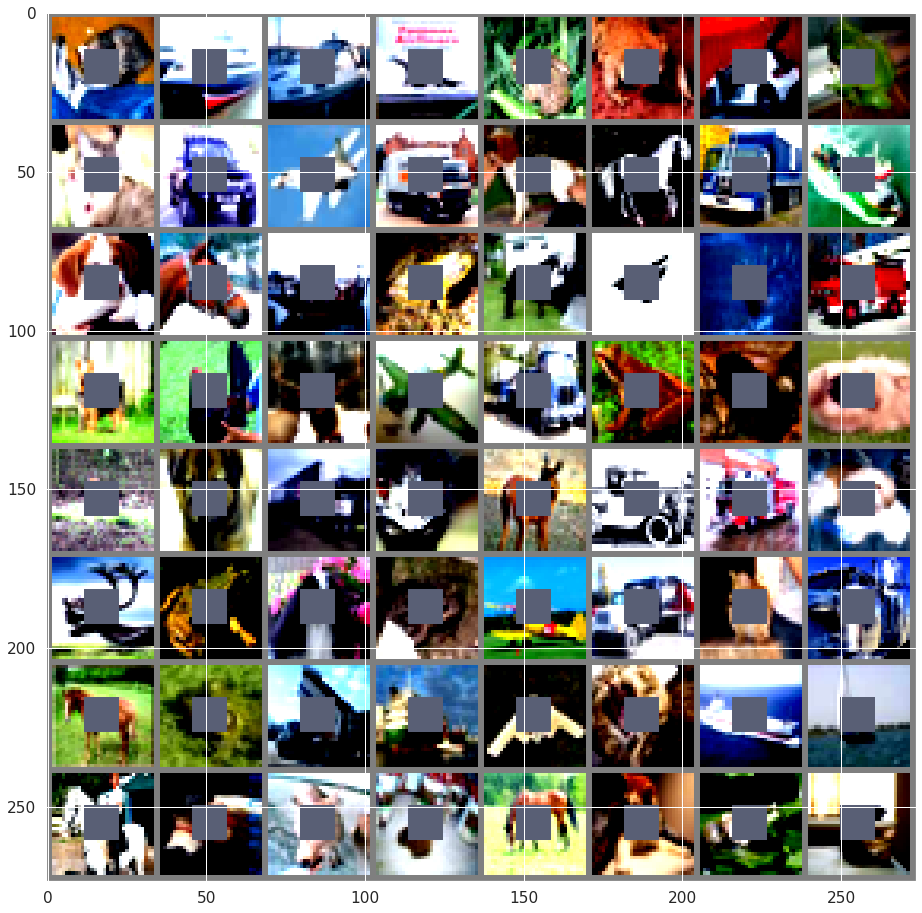

  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship plane   cat  ship  ship horse horse  deer  frog horse   cat  frog   cat


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(16,16)) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(64)))

In [ ]:
'''DenseNet in PyTorch.'''
import math

import torch
import torch.nn as nn
import torch.nn.functional as F


class Bottleneck(nn.Module):
    def __init__(self, in_planes, growth_rate):
        super(Bottleneck, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.conv1 = nn.Conv2d(in_planes, 4*growth_rate, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4*growth_rate)
        self.conv2 = nn.Conv2d(4*growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        out = torch.cat([out,x], 1)
        return out


class Transition(nn.Module):
    def __init__(self, in_planes, out_planes):
        super(Transition, self).__init__()
        self.bn = nn.BatchNorm2d(in_planes)
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=1, bias=False)

    def forward(self, x):
        out = self.conv(F.relu(self.bn(x)))
        out = F.avg_pool2d(out, 2)
        return out


class DenseNet(nn.Module):
    def __init__(self, block, nblocks, growth_rate=12, reduction=0.5, num_classes=10):
        super(DenseNet, self).__init__()
        self.growth_rate = growth_rate

        num_planes = 2*growth_rate
        self.conv1 = nn.Conv2d(3, num_planes, kernel_size=3, padding=1, bias=False)

        self.dense1 = self._make_dense_layers(block, num_planes, nblocks[0])
        num_planes += nblocks[0]*growth_rate
        out_planes = int(math.floor(num_planes*reduction))
        self.trans1 = Transition(num_planes, out_planes)
        num_planes = out_planes

        self.dense2 = self._make_dense_layers(block, num_planes, nblocks[1])
        num_planes += nblocks[1]*growth_rate
        out_planes = int(math.floor(num_planes*reduction))
        self.trans2 = Transition(num_planes, out_planes)
        num_planes = out_planes

        self.dense3 = self._make_dense_layers(block, num_planes, nblocks[2])
        num_planes += nblocks[2]*growth_rate
        out_planes = int(math.floor(num_planes*reduction))
        self.trans3 = Transition(num_planes, out_planes)
        num_planes = out_planes

        self.dense4 = self._make_dense_layers(block, num_planes, nblocks[3])
        num_planes += nblocks[3]*growth_rate

        self.bn = nn.BatchNorm2d(num_planes)
        self.linear = nn.Linear(num_planes, num_classes)

    def _make_dense_layers(self, block, in_planes, nblock):
        layers = []
        for i in range(nblock):
            layers.append(block(in_planes, self.growth_rate))
            in_planes += self.growth_rate
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.trans1(self.dense1(out))
        out = self.trans2(self.dense2(out))
        out = self.trans3(self.dense3(out))
        out = self.dense4(out)
        out = F.avg_pool2d(F.relu(self.bn(out)), 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def DenseNet121():
    return DenseNet(Bottleneck, [6,12,24,16], growth_rate=32)

net = DenseNet121()
# print(net)
net = net.cuda()
# print(net)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True


In [ ]:
# net = net.to(device)

# #torch.backends.cudnn.deterministic = True
# # if device == 'cuda':
# #     net = torch.nn.DataParallel(net)
# #     cudnn.benchmark = True
# net = torch.nn.DataParallel(net)
# torch.nn.cudnn.deterministic = True
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print("We are working with ", device)

In [ ]:
import torch.optim as optim
#update weights here
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

In [ ]:
def train(epoch):
    #print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
      if batch_idx%1000 == 0:
        print('batch', batch_idx)
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      if batch_idx%1000 == 0:
        print(train_loss)
      _, predicted = outputs.max(1)
      total += targets.size(0)
      correct += predicted.eq(targets).sum().item()
    return train_loss

In [ ]:
def save_checkpoint(state, path = F"/content/gdrive/My Drive/cifar-gaussian.pth"):
    torch.save(state, path)

load_net = True

def load_checkpoint(checkpoint):
    net.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    #epoch.load_state_dict(checkpoint['epoch'])


In [ ]:
for epoch in range(0, 50):
    #if epoch % 4 == 1:
    try:
      load_checkpoint(torch.load(F"/content/gdrive/My Drive/cifar-gaussian.pth"))
    except:
      print('no model found')
    #  print('previous model not available')
    train(epoch)
    print('\nEpoch: %d' % epoch)
    #print(train_loss)
    #if epoch % 4 == 0:
    checkpoint = {'state_dict' : net.state_dict(), 'optimizer': optimizer.state_dict()}
    save_checkpoint(checkpoint)

batch 0
0.06510786712169647

Epoch: 0
batch 0
0.13919207453727722

Epoch: 1
batch 0
0.06950196623802185

Epoch: 2
batch 0
0.09486168622970581

Epoch: 3
batch 0
0.028497416526079178

Epoch: 4
batch 0
0.013886429369449615

Epoch: 5
batch 0
0.0739566907286644

Epoch: 6
batch 0
0.07043149322271347

Epoch: 7
batch 0
0.15821397304534912

Epoch: 8
batch 0
0.054444730281829834

Epoch: 9
batch 0
0.15265262126922607

Epoch: 10
batch 0
0.08324020355939865

Epoch: 11
batch 0
0.10780970007181168

Epoch: 12
batch 0
0.027439825236797333

Epoch: 13
batch 0
0.1503818780183792

Epoch: 14
batch 0
0.026957422494888306

Epoch: 15
batch 0
0.11955808848142624

Epoch: 16
batch 0
0.06942278891801834

Epoch: 17
batch 0
0.028188079595565796

Epoch: 18
batch 0
0.09500456601381302

Epoch: 19
batch 0
0.07684904336929321

Epoch: 20
batch 0
0.11241337656974792

Epoch: 21
batch 0
0.1330597996711731

Epoch: 22
batch 0
0.01683104783296585

Epoch: 23
batch 0
0.1336945742368698

Epoch: 24
batch 0
0.02919808030128479

Epoc

In [ ]:
# for epoch in range(1):  # loop over the dataset multiple times
#     print('epoch', epoch)
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
#         print('step ', i)
#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0

# print('Finished Training')

In [ ]:
load_checkpoint(torch.load('/content/gdrive/My Drive/cifar-model2.pth'))
net.eval()

DataParallel(
  (module): DenseNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (dense1): Sequential(
      (0): Bottleneck(
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (1): Bottleneck(
        (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (2): Bottleneck(
        (bn1): BatchNorm2d(12

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


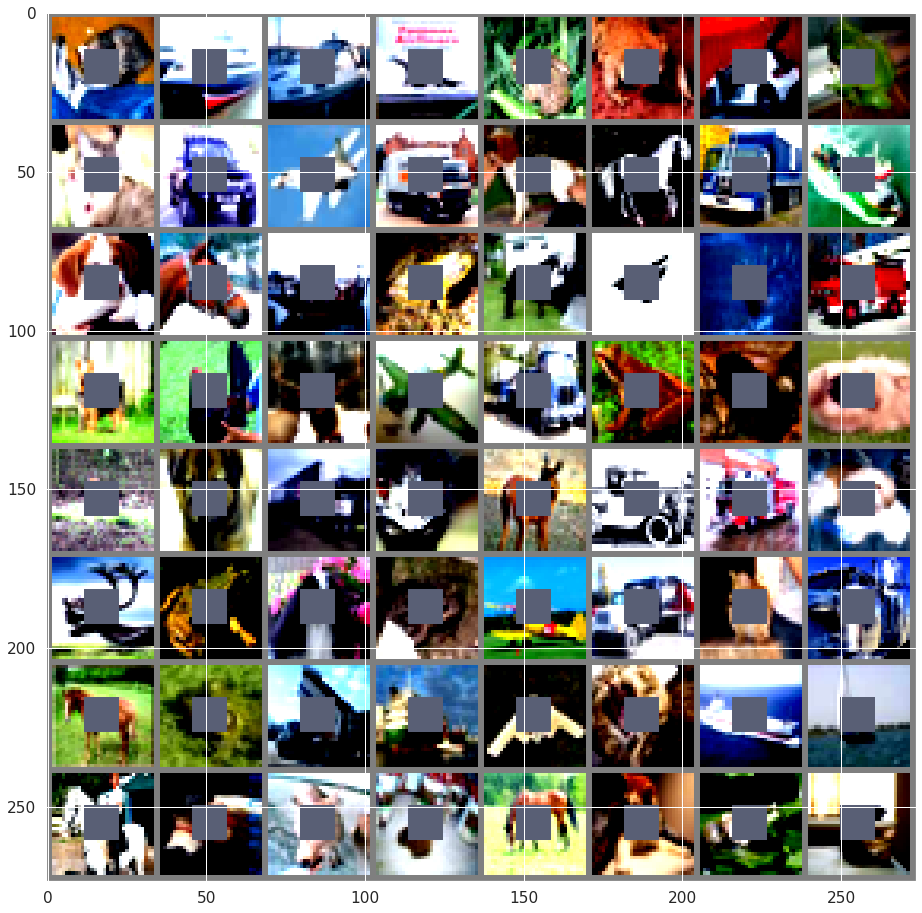

tensor([5, 8, 8, 8, 6, 6, 9, 9, 3, 9, 0, 9, 5, 7, 9, 8, 7, 7, 8, 6, 9, 0, 8, 9,
        4, 9, 3, 0, 9, 2, 5, 9, 4, 5, 9, 2, 4, 9, 9, 5, 0, 6, 7, 3, 0, 9, 3, 9,
        7, 9, 9, 8, 2, 3, 8, 8, 7, 9, 5, 5, 7, 3, 6, 9], device='cuda:0')
  dog  ship  ship  ship  frog  frog truck truck   cat truck plane truck   dog horse truck  ship horse horse  ship  frog truck plane  ship truck  deer truck   cat plane truck  bird   dog truck  deer   dog truck  bird  deer truck truck   dog plane  frog horse   cat plane truck   cat truck horse truck truck  ship  bird   cat  ship  ship horse truck   dog   dog horse   cat  frog truck
62.5


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(16,16)) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            imshow(torchvision.utils.make_grid(inputs))
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            print(predicted)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            # show images
            
            break
    print(' '.join('%5s' % classes[predicted[j]] for j in range(64)))
    acc = 100.*correct/total
    print(acc)
sample = next(iter(trainset))
image, label = sample   
for epoch in range(0, 1):
  test(epoch)


In [ ]:
from sklearn.metrics import confusion_matrix
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd

all_targets = []
all_predicted = []

def test():
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            all_targets.append(targets)
            all_predicted.append(predicted)
            break
    acc = 100.*correct/total
    print(acc)

test()

62.5


In [ ]:
all_targets = torch.cat(all_targets).cpu().numpy()
all_predicted = torch.cat(all_predicted).cpu().numpy()

(64,)
[[4 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 3]
 [0 0 1 0 0 0 0 0 0 1]
 [0 0 0 4 0 1 0 0 0 1]
 [1 0 0 1 2 1 0 0 1 0]
 [0 0 0 0 1 3 0 2 0 1]
 [0 0 1 1 0 2 5 0 0 2]
 [0 0 0 0 0 0 0 5 0 2]
 [0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 9]]


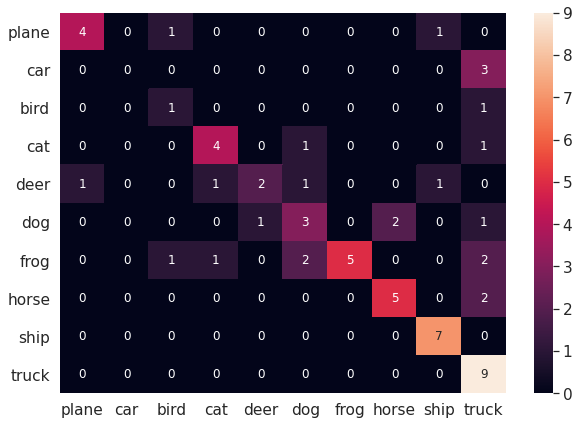

In [ ]:
print(all_targets.shape)


cm = confusion_matrix(all_targets,all_predicted)
print(cm)

 
df_cm = pd.DataFrame(cm, list(classes), columns=list(classes))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [ ]:
def set_size(w,h, ax=None):
  """ w, h: width, height in inches """
  if not ax: 
    ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [ ]:
import torchvision.models as tmodels
from functools import partial
import collections

def custom_viz(kernels, path=None, cols=None):
  """Visualize weight and activation matrices learned 
    during the optimization process. Works for any size of kernels.
    
    Arguments
    =========
    kernels: Weight or activation matrix. Must be a high dimensional
    Numpy array. Tensors will not work.
    path: Path to save the visualizations.
    cols: TODO: Number of columns (doesn't work completely yet.)
    
    Example
    =======
    kernels = model.conv1.weight.cpu().detach().clone()
    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()
    custom_viz(kernels, 'results/conv1_weights.png', 5)
    """
  def set_size(w,h, ax=None):
 
    if not ax: 
      ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

  N = kernels.shape[0]
  C = kernels.shape[1]
  print(N, C)
  Tot = N*C

  # If single channel kernel with HxW size,# plot them in a row.# Else, plot image with C number of columns.
  if C>1:
    columns = C
  elif cols==None:
    columns = N
  elif cols:
    columns = cols
  rows = Tot // columns 
  rows += Tot % columns

  pos = range(1,Tot + 1)

  fig = plt.figure(1)
  fig.tight_layout()
  k=0
  for i in range(kernels.shape[0]):
  #for i in range(3):
      print(i)
      for j in range(kernels.shape[1]):
         
          img = kernels[i][j]
          
          ax = fig.add_subplot(rows,columns,pos[k])
          ax.imshow(img, cmap='gray')
          plt.axis('off')
          k = k+1
  
  set_size(36,60,ax)
  if path:
      plt.savefig(path, dpi=240)
  
  plt.show()

In [ ]:
kernels = net.module.conv1.weight.cpu().detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
custom_viz(kernels, '/content/gdrive/My Drive/Cifar10/trial.png')

64 3
torch.Size([3, 3])


TypeError: ignored

<Figure size 432x288 with 0 Axes>

128 96
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


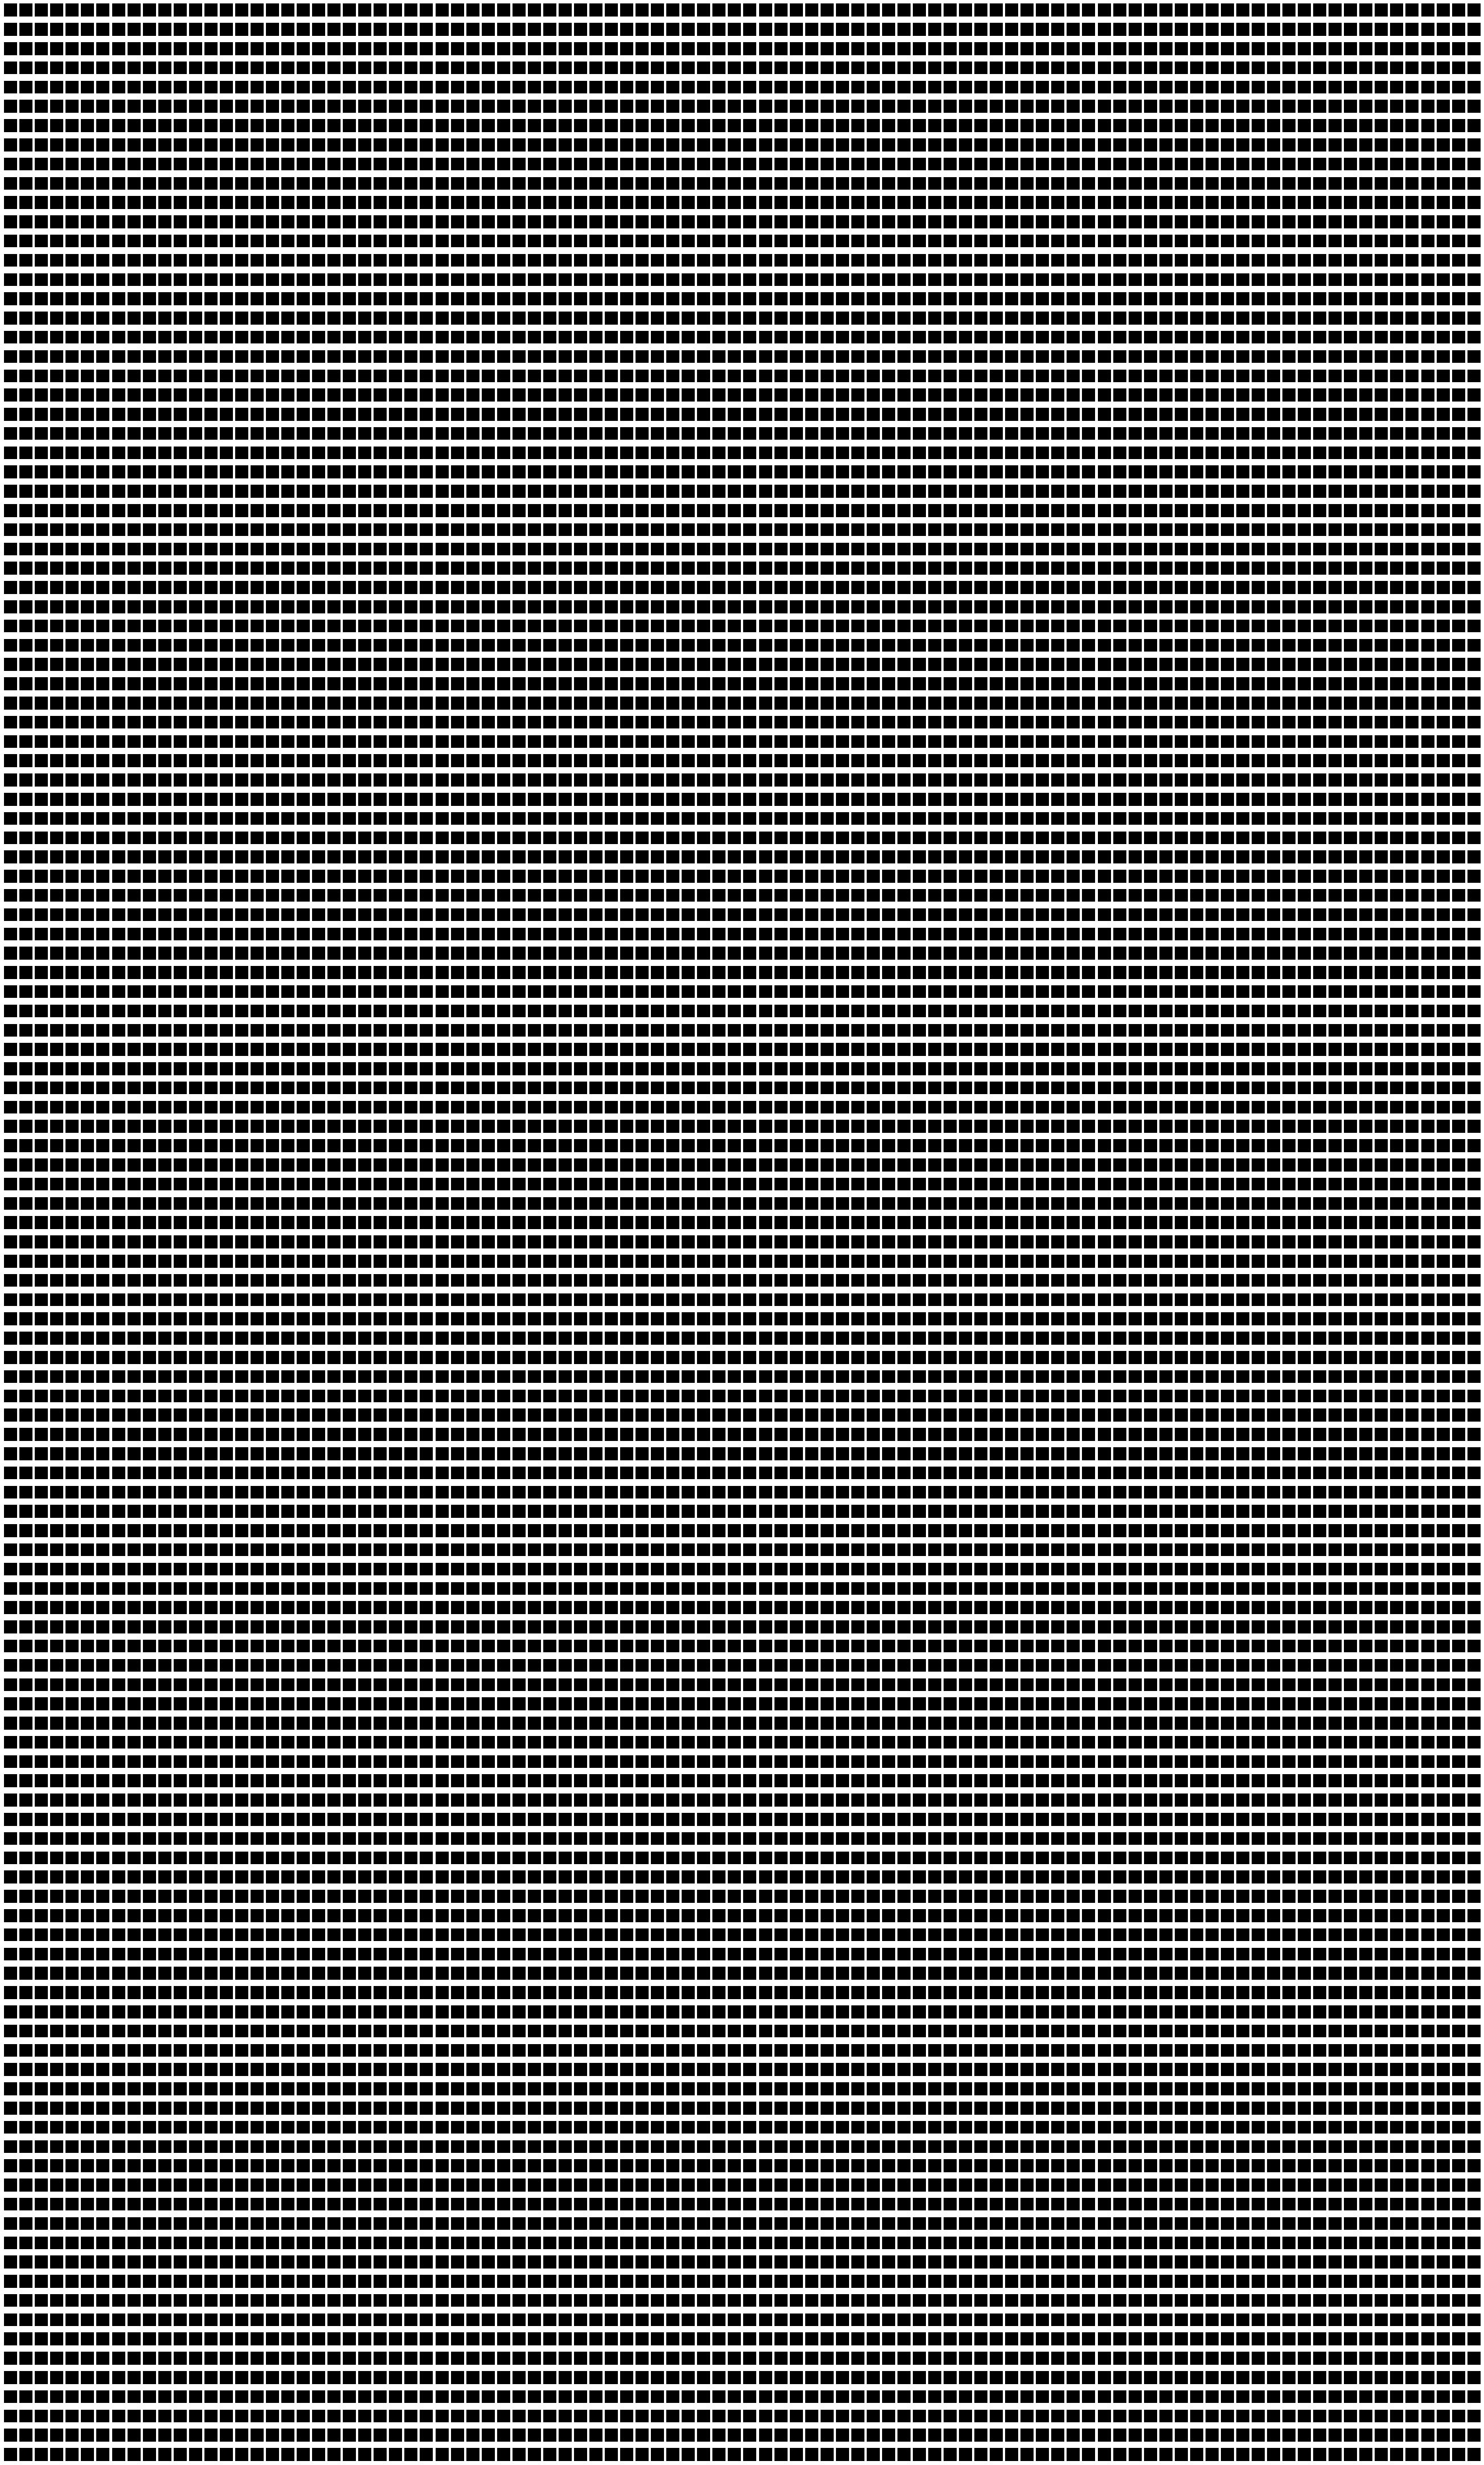

32 128
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


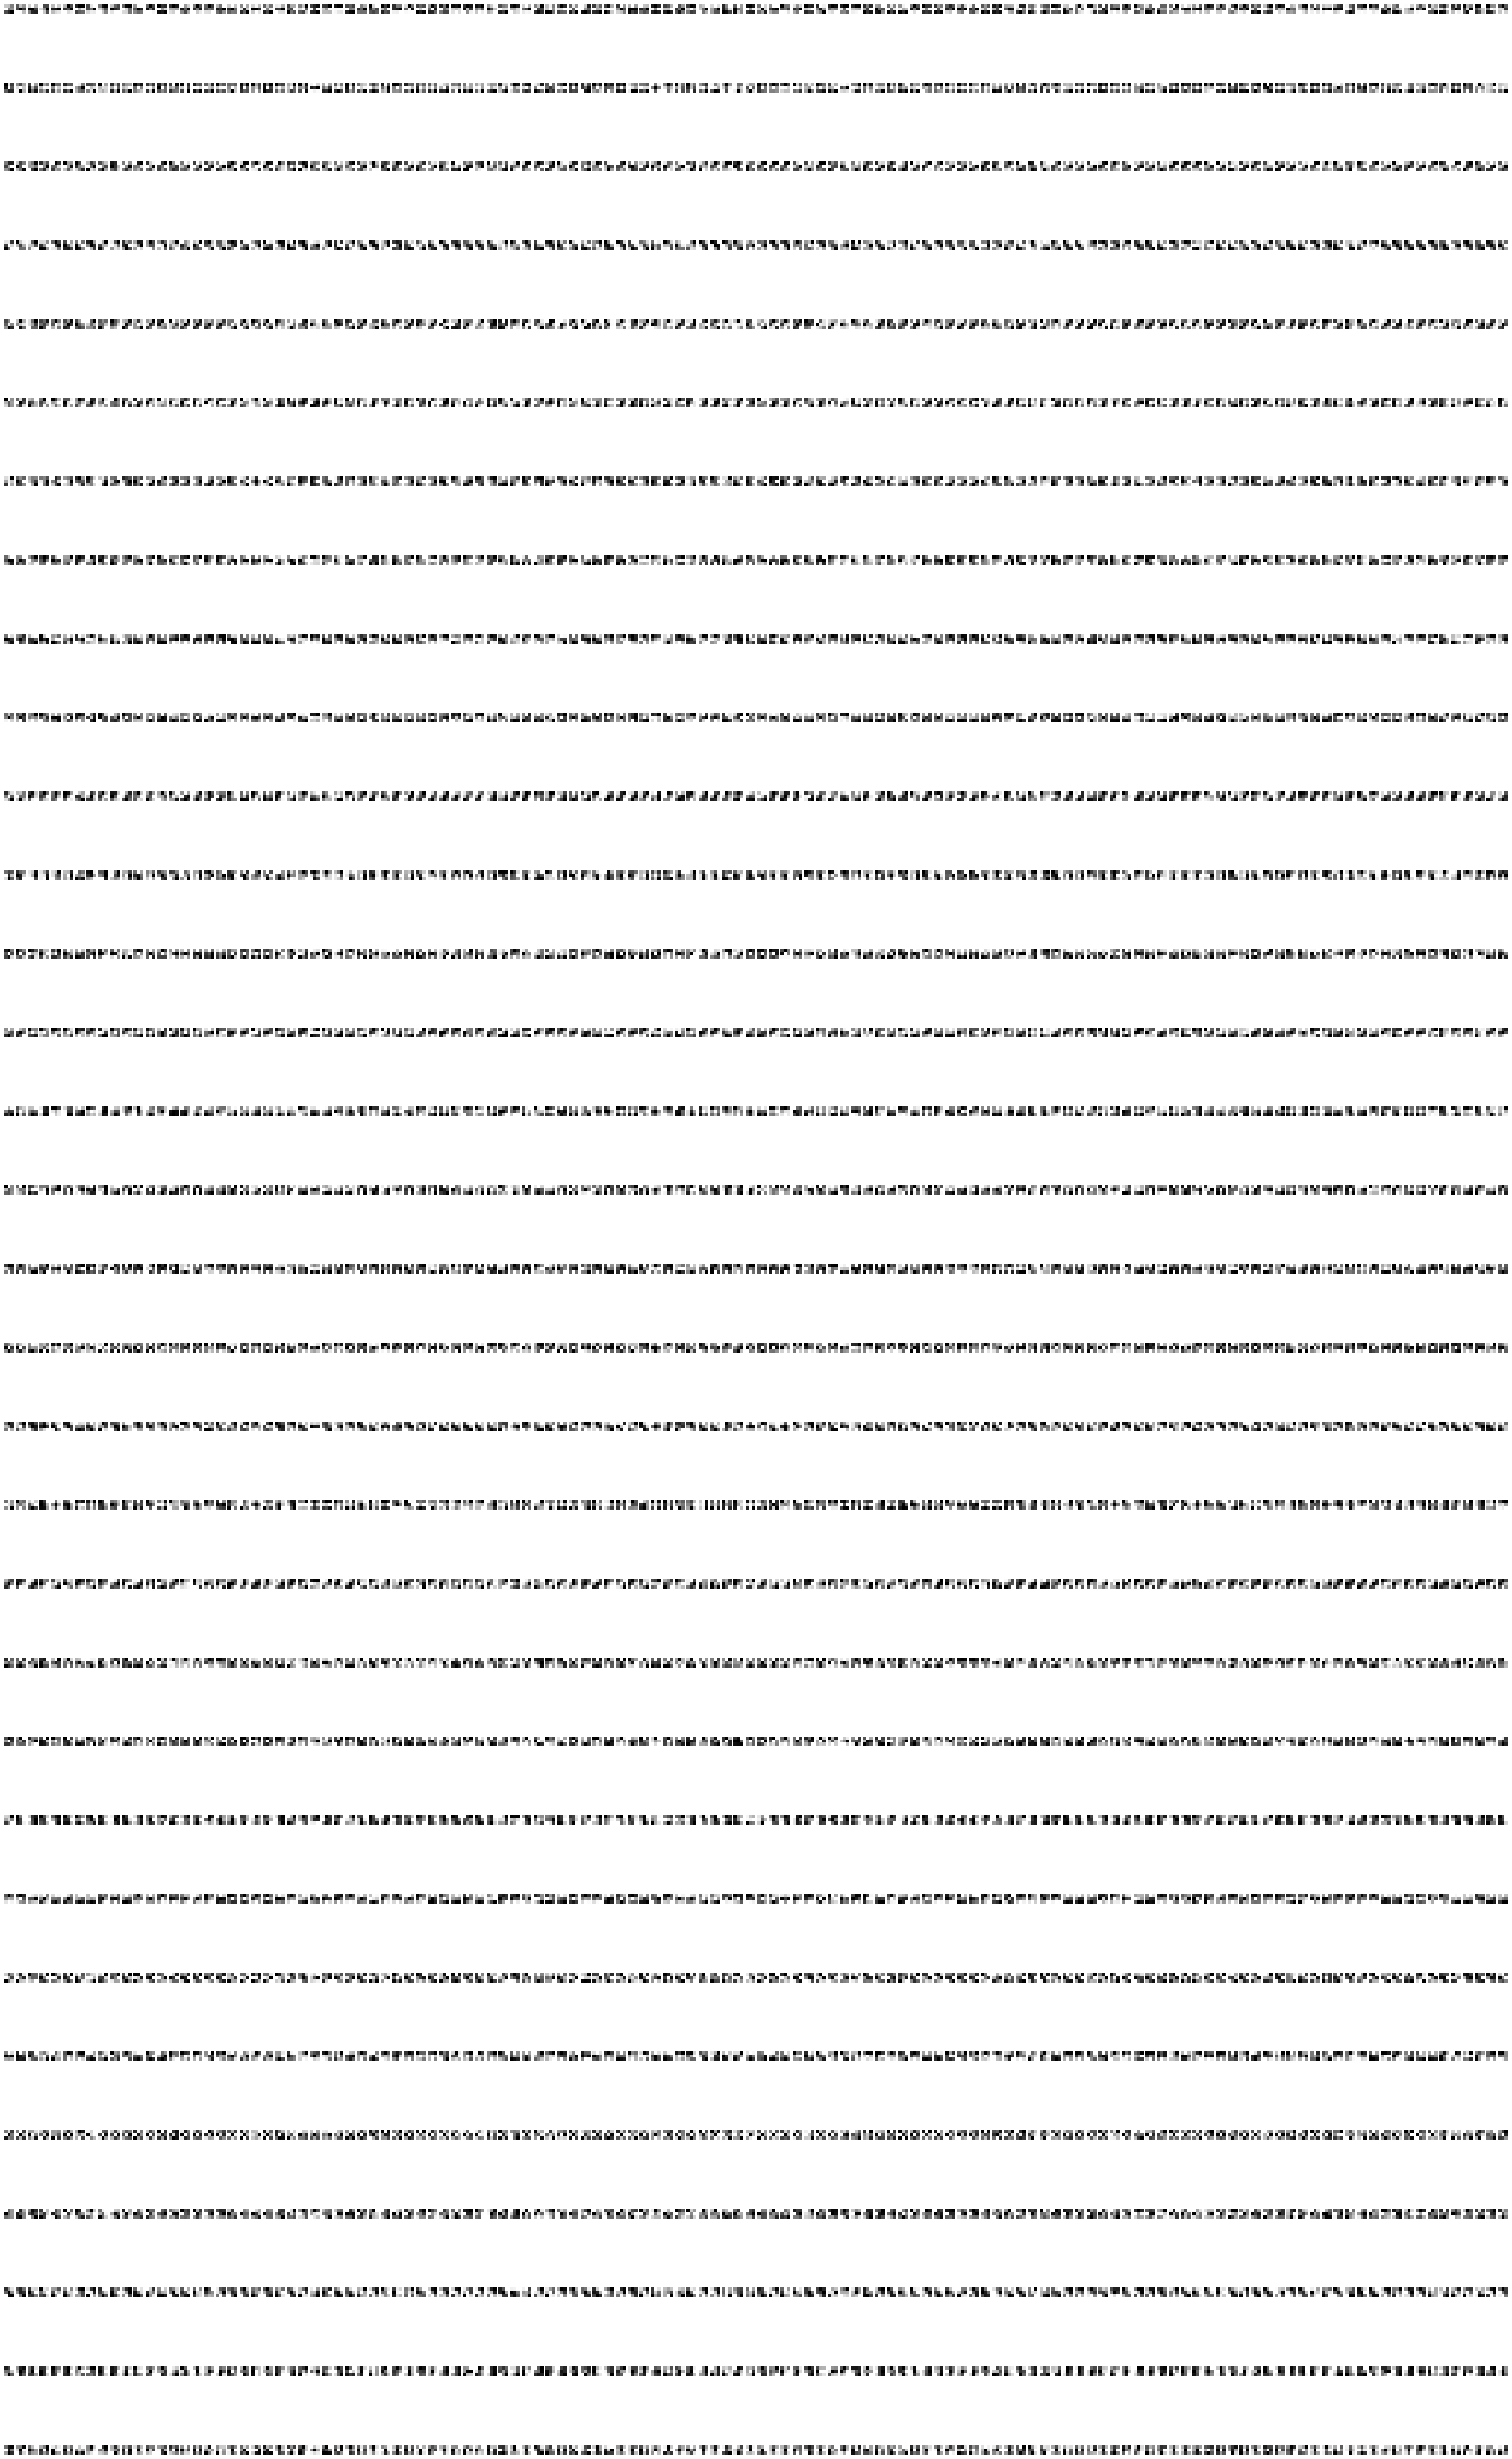

128 128
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f010b008158> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f010ad2d620> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for i in range(1,6):
  layer = i
  path1 = '/content/gdrive/My Drive/Cifar10/' + 'dense1_' + str(i) + '_conv1.png'
  kernels = net.module.dense1[layer].conv1.weight.cpu().detach().clone()
  kernels = kernels - kernels.min()
  kernels = kernels / kernels.max()
  custom_viz(kernels, path1)

  path2 = '/content/gdrive/My Drive/Cifar10/' + 'dense1_' + str(i) + '_conv2.png'
  kernels = net.module.dense1[layer].conv2.weight.cpu().detach().clone()
  kernels = kernels - kernels.min()
  kernels = kernels / kernels.max()
  custom_viz(kernels, path2)
  

In [ ]:
import torchvision.models as tmodels
from functools import partial
import collections

def custom_viz(kernels, path=None, cols=None):
  """Visualize weight and activation matrices learned 
    during the optimization process. Works for any size of kernels.
    
    Arguments
    =========
    kernels: Weight or activation matrix. Must be a high dimensional
    Numpy array. Tensors will not work.
    path: Path to save the visualizations.
    cols: TODO: Number of columns (doesn't work completely yet.)
    
    Example
    =======
    kernels = model.conv1.weight.cpu().detach().clone()
    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()
    custom_viz(kernels, 'results/conv1_weights.png', 5)
    """
  def set_size(w,h, ax=None):
 
    if not ax: 
      ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

  N = kernels.shape[0]
  C = kernels.shape[1]
  print(N, C)
  Tot = N*C

  # If single channel kernel with HxW size,# plot them in a row.# Else, plot image with C number of columns.
  if C>1:
    columns = C
  elif cols==None:
    columns = N
  elif cols:
    columns = cols
  rows = Tot // columns 
  rows += Tot % columns

  pos = range(1,Tot + 1)

  fig = plt.figure(1)
  fig.tight_layout()
  k=0
  image = np.array([4,kernels.shape[1]])
  #for i in range(kernels.shape[0]):
  print(kernels[0][0].shape)
  for i in range(3):
      img1 = np.asarray(kernels[i][0], dtype = 'float64')
      for j in range(1, kernels.shape[1]):
          img1 = np.concatenate(img1, np.ones((3,3)))
          img1 = np.concatenate(img1, np.asarray(kernels[i][j]))
          img = kernels[i][j]
          print(img)
          ax = fig.add_subplot(rows,columns,pos[k])
          ax.imshow(img, cmap='gray')
          plt.axis('off')
          k = k+1
      image = np.stack((image,img1), axis = 0)
  print(ax)
  set_size(36,60,ax)
  if path:
      plt.savefig(path, dpi=240)
  
  plt.show()

In [ ]:
print(np.ones((3,3)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
